Basic Statistics


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_csv('/content/sales_data_with_discounts.csv')

In [ ]:
df=dataset

In [ ]:
numerical_column=dataset.select_dtypes(include=['number'])

In [ ]:
def calculate_stats(df, column_name):
    mean = df[column_name].mean()
    median = df[column_name].median()
    mode = df[column_name].mode().iloc[0] # Handle potential multiple modes
    std_dev = df[column_name].std()
    return mean, median, mode, std_dev

In [ ]:
for column in numerical_column.columns:
  mean, median, mode, std_dev = calculate_stats(df, column)
  print(f"Statistics for column '{column}':")
  print(f"- Mean: {mean}")
  print(f"- Median: {median}")
  print(f"- Mode: {mode}")
  print(f"- Standard Deviation: {std_dev}\n")

Statistics for column 'Volume':
- Mean: 5.066666666666666
- Median: 4.0
- Mode: 3
- Standard Deviation: 4.231602391213926

Statistics for column 'Avg Price':
- Mean: 10453.433333333332
- Median: 1450.0
- Mode: 400
- Standard Deviation: 18079.90483993645

Statistics for column 'Total Sales Value':
- Mean: 33812.83555555555
- Median: 5700.0
- Mode: 24300
- Standard Deviation: 50535.07417255328

Statistics for column 'Discount Rate (%)':
- Mean: 15.155241895330914
- Median: 16.57776564929597
- Mode: 5.007822189204133
- Standard Deviation: 4.220602153325511

Statistics for column 'Discount Amount':
- Mean: 3346.499424342415
- Median: 988.9337332382784
- Mode: 69.17794228822787
- Standard Deviation: 4509.9029633539985

Statistics for column 'Net Sales Value':
- Mean: 30466.336131270138
- Median: 4677.788059301853
- Mode: 326.97480055470817
- Standard Deviation: 46358.656624066934



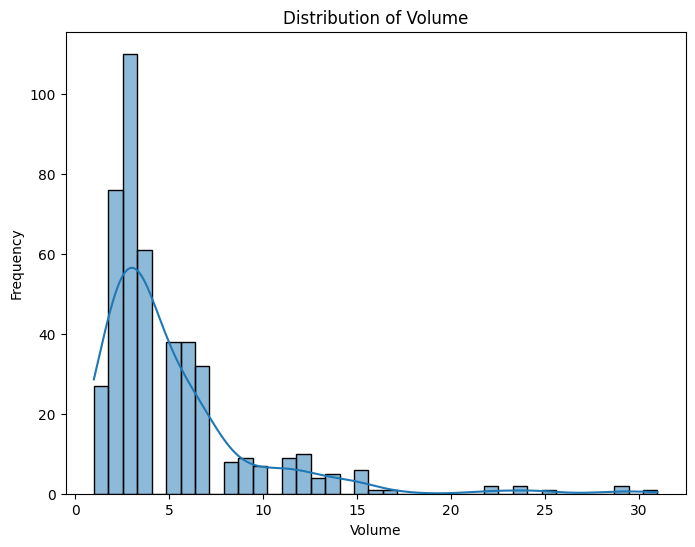

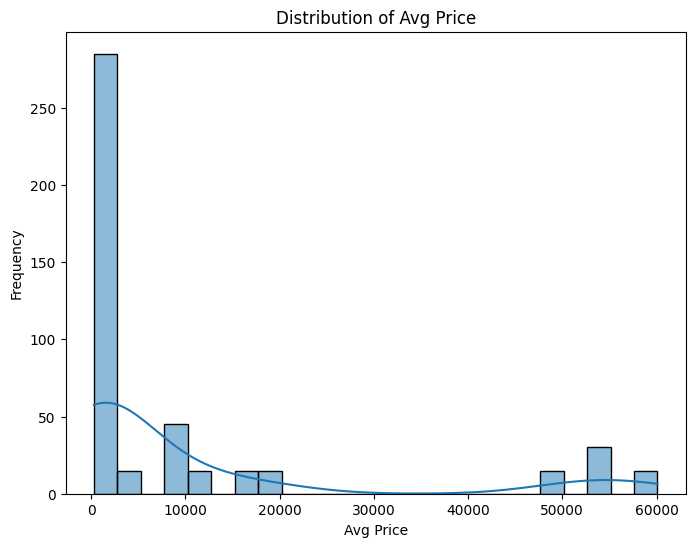

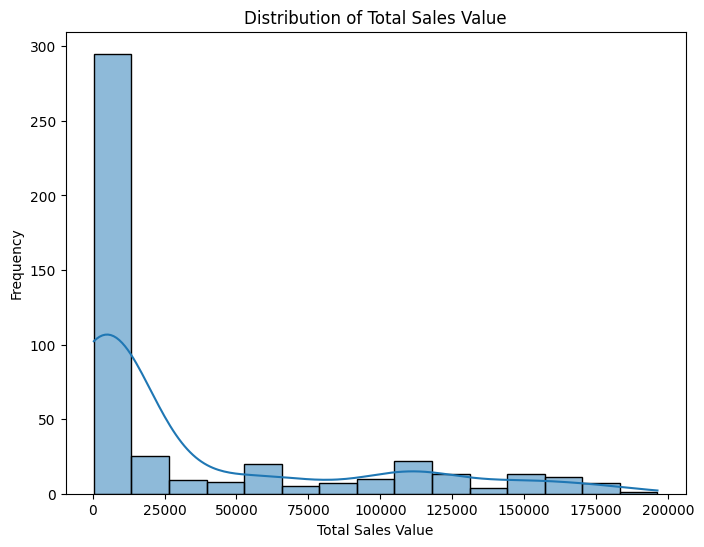

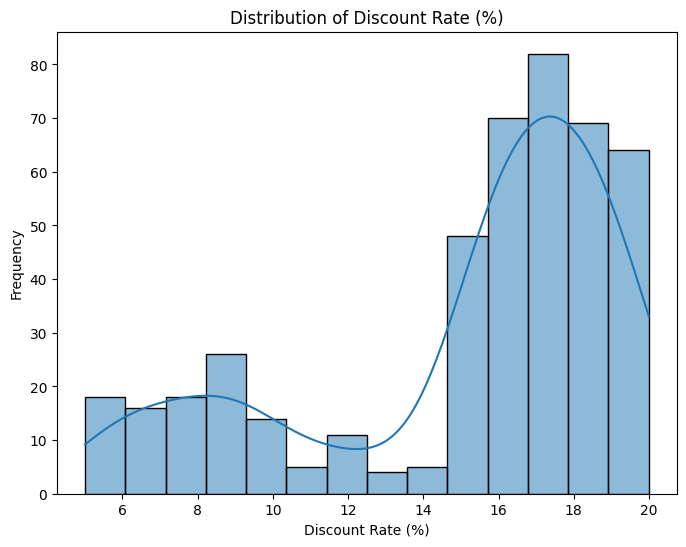

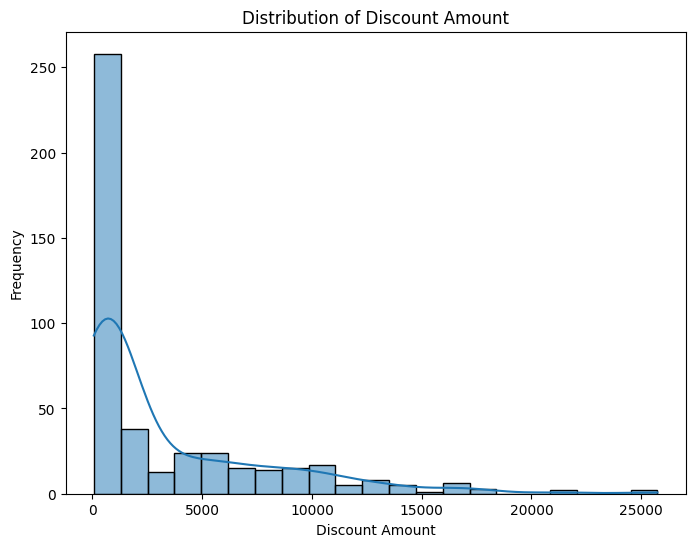

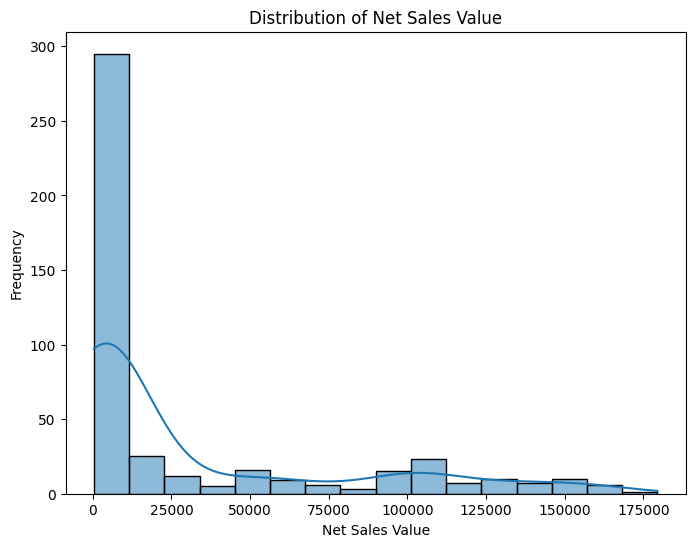

In [ ]:
# Plot histograms for each numerical column
for column in numerical_column.columns:  # Use numerical_column.columns
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)  # Include KDE for better visualization
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

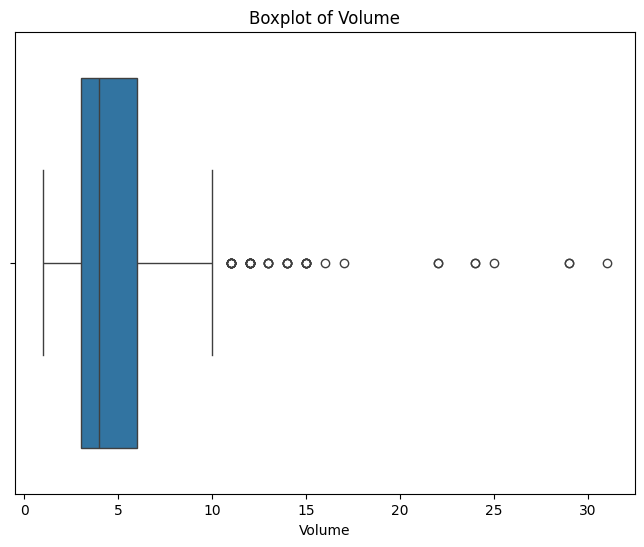

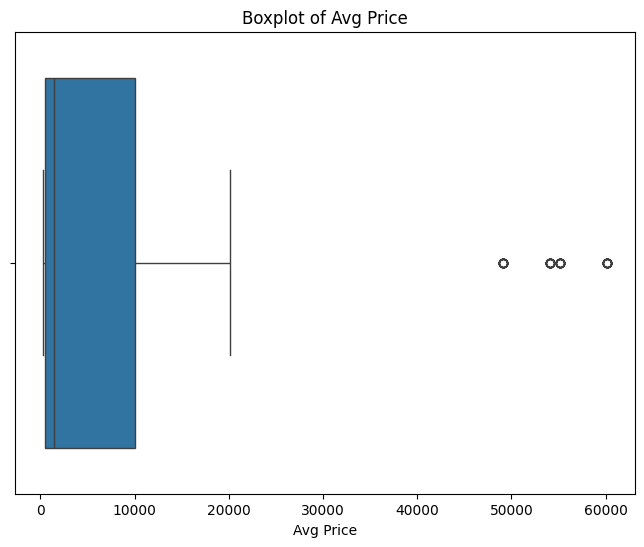

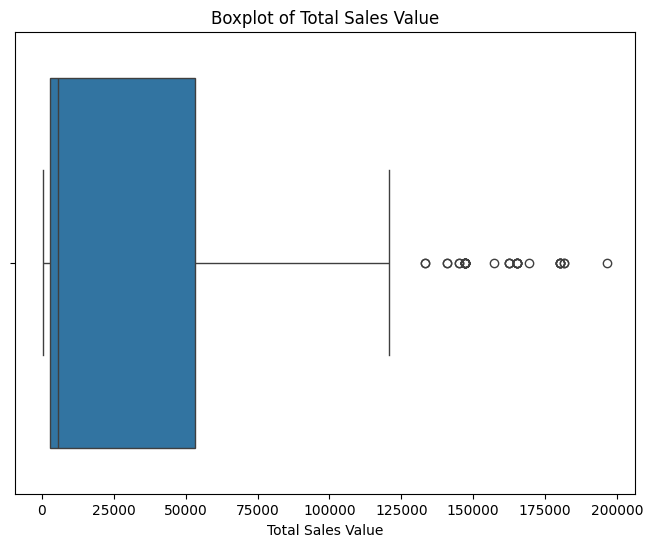

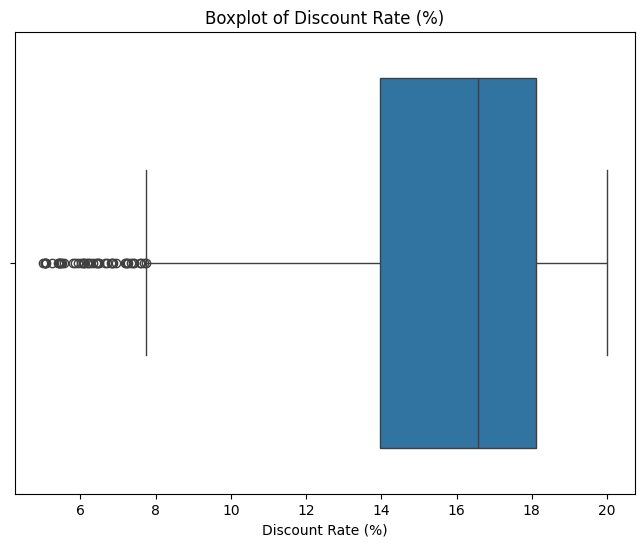

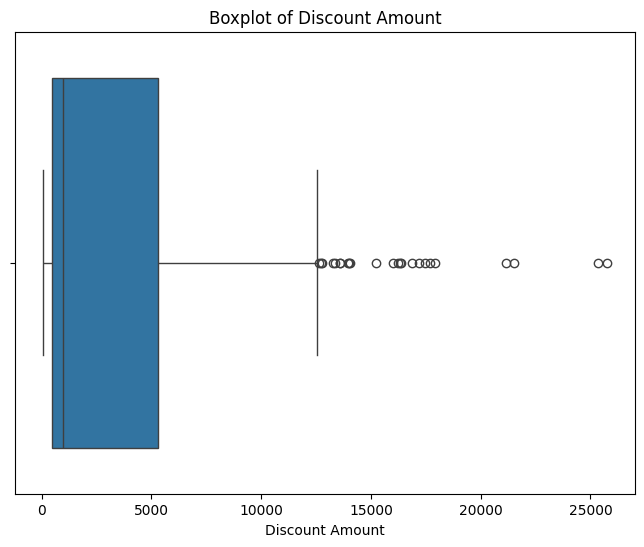

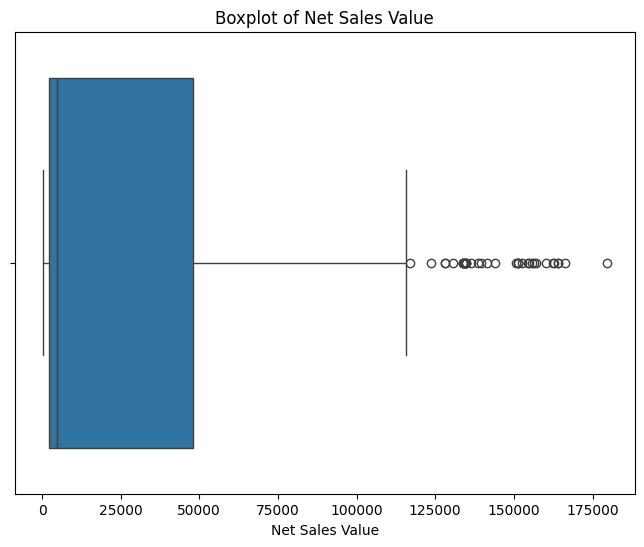

In [ ]:
# Create boxplots for each numerical column
for column in numerical_column.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [ ]:

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

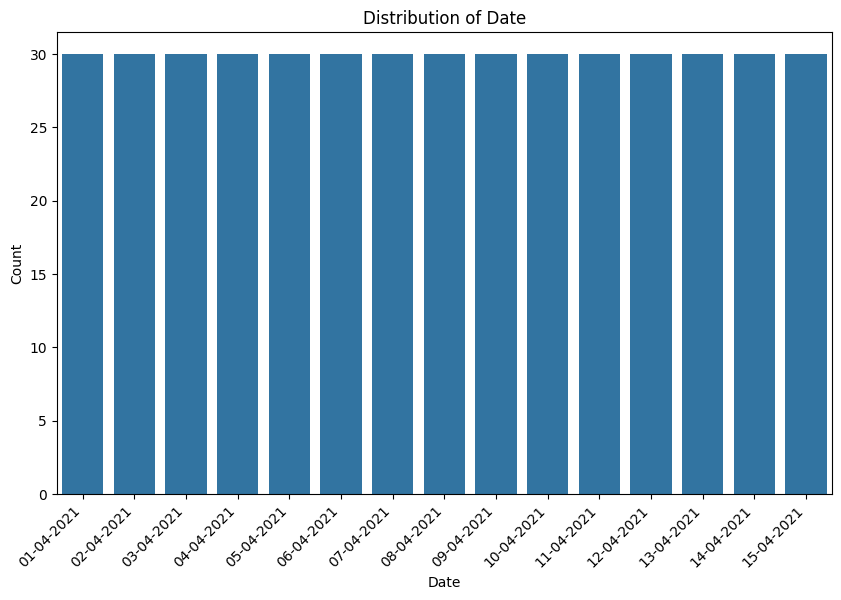

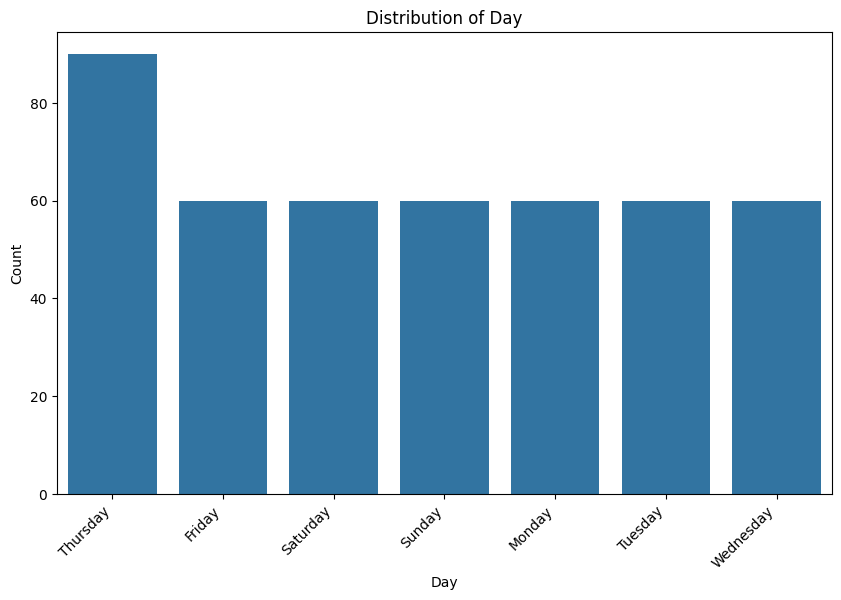

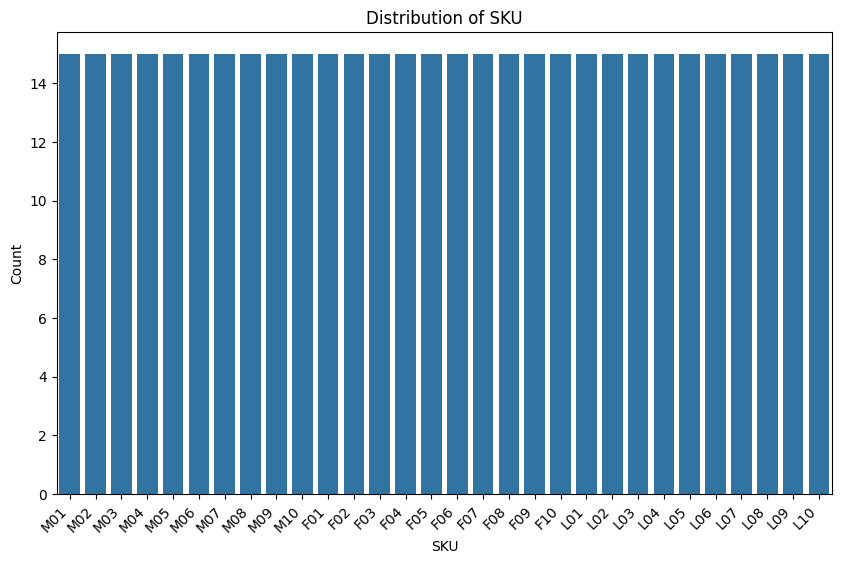

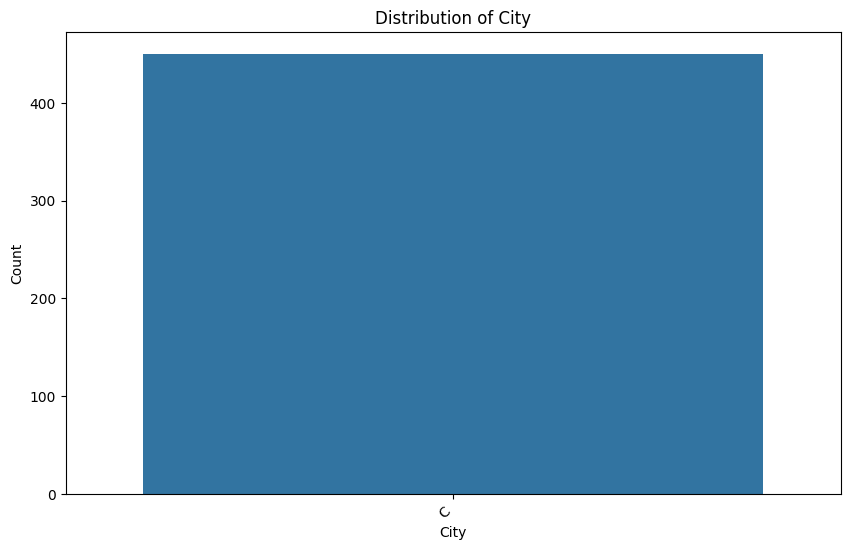

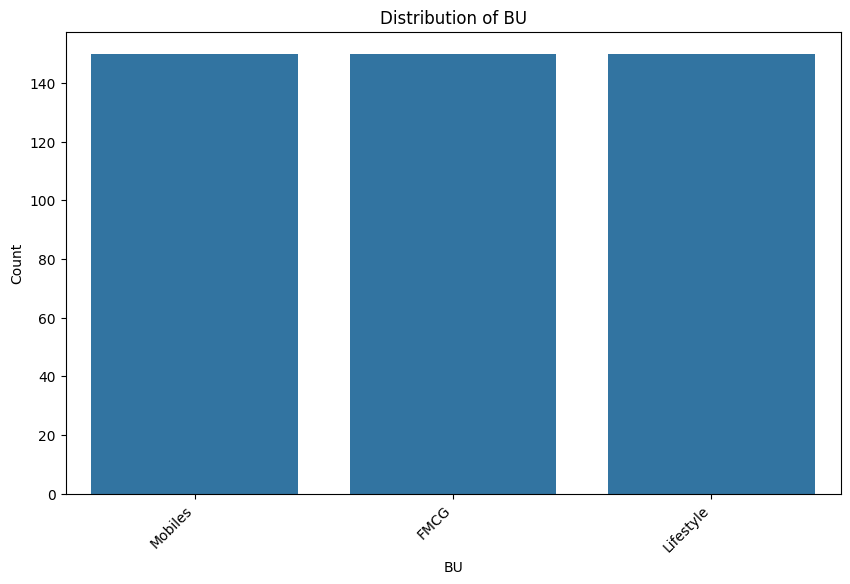

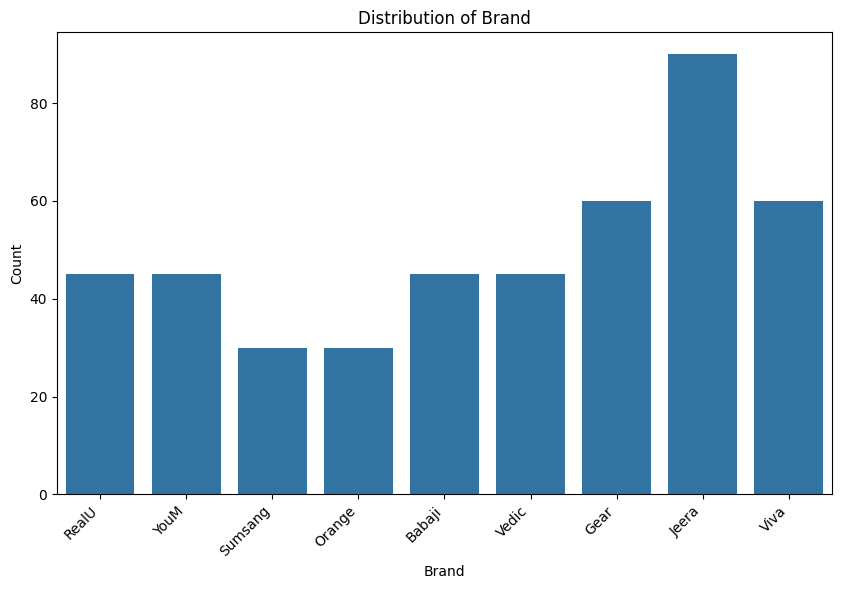

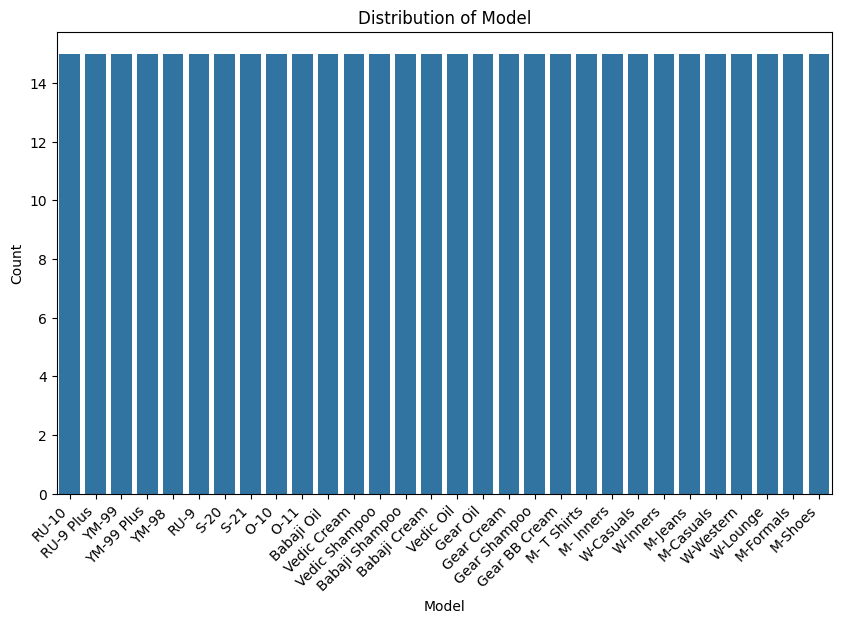

In [ ]:
# Create bar charts for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

In [ ]:
# Standardize numerical features
numerical_columns = df.select_dtypes(include=['number']).columns
for column in numerical_columns:
    df[col + '_zscore'] = (df[col] - df[col].mean()) / df[col].std()

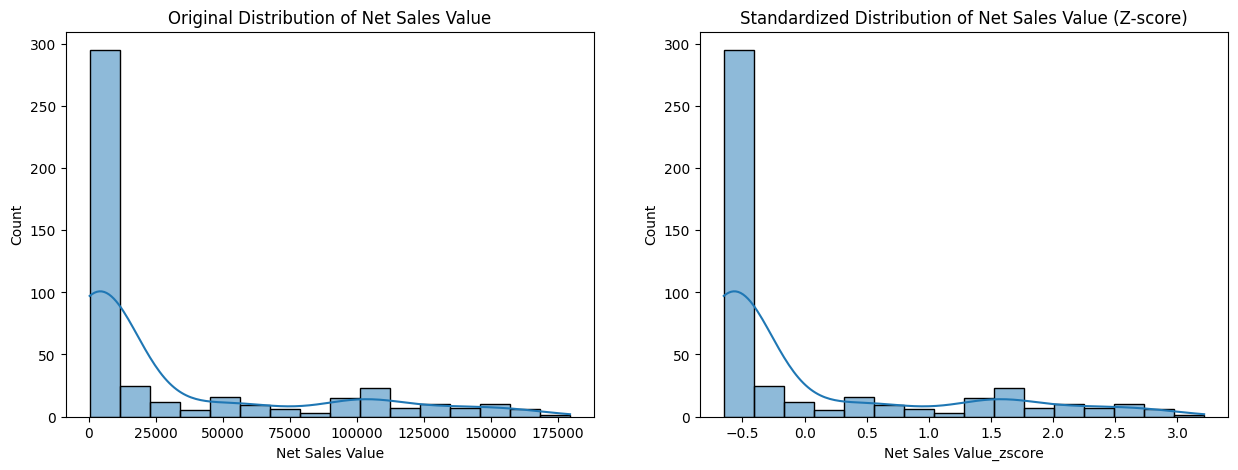

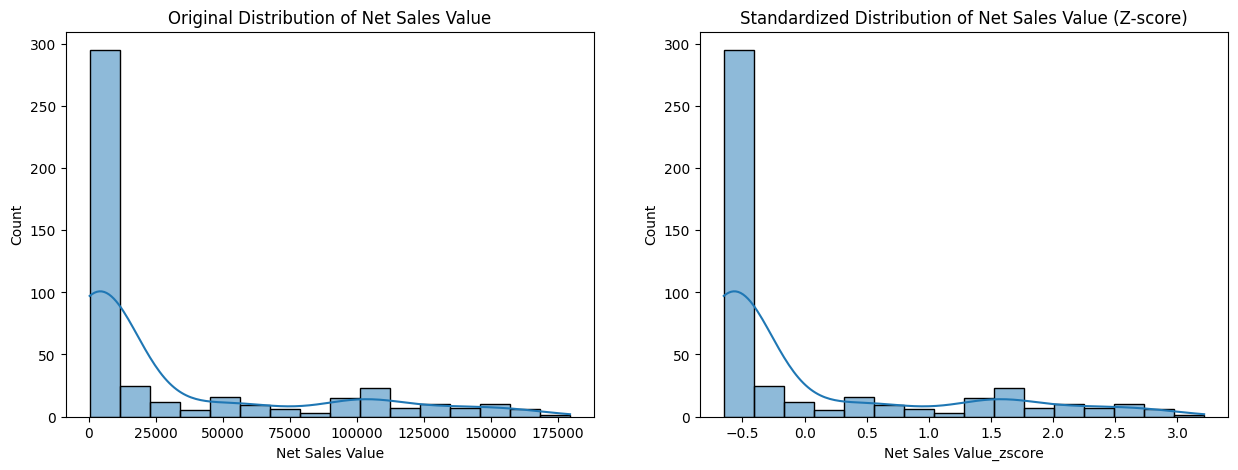

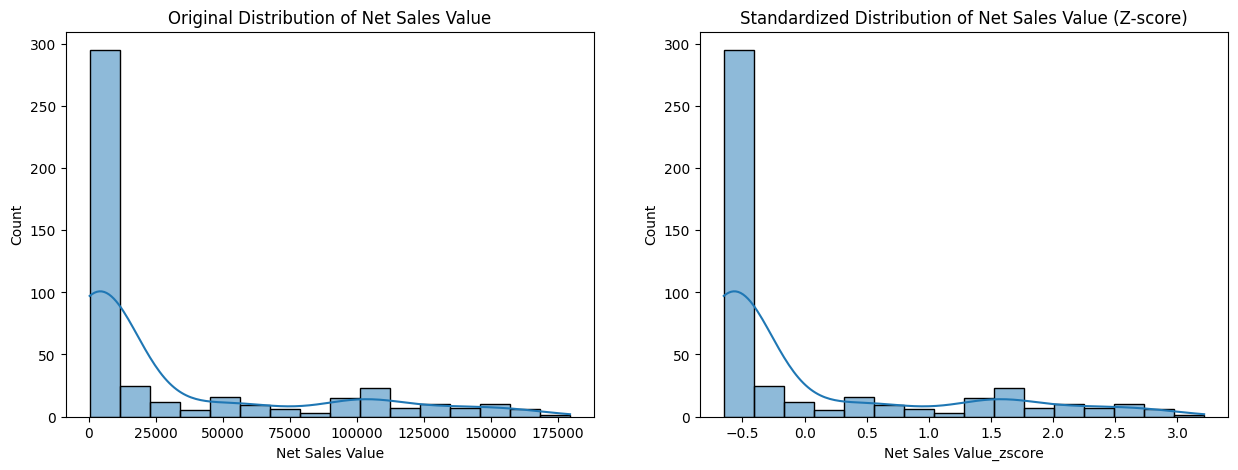

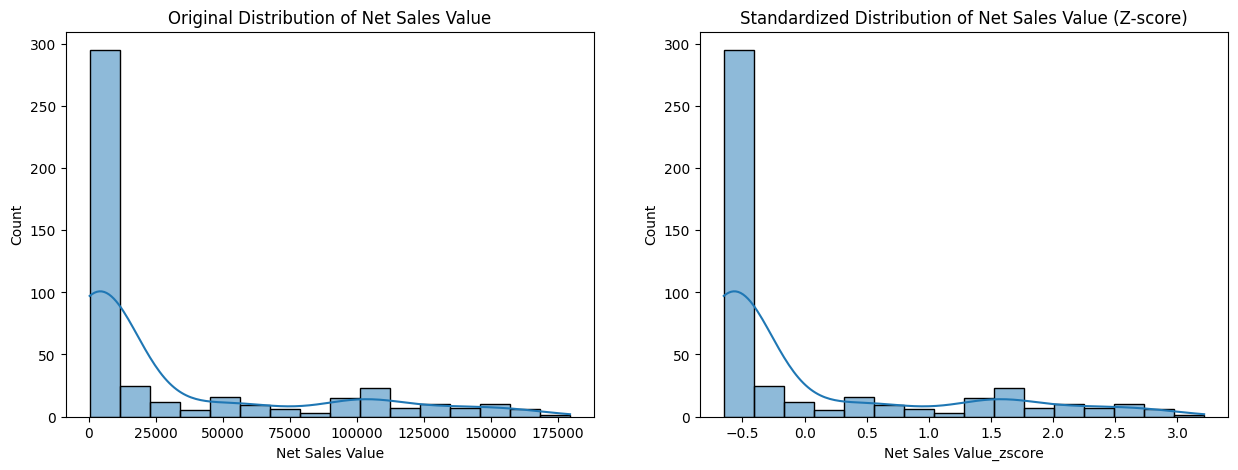

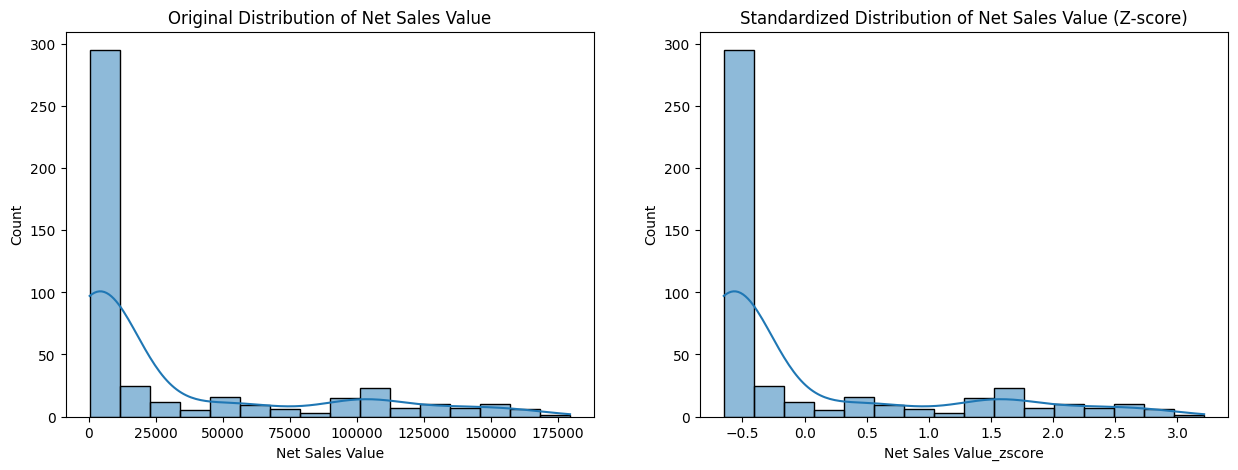

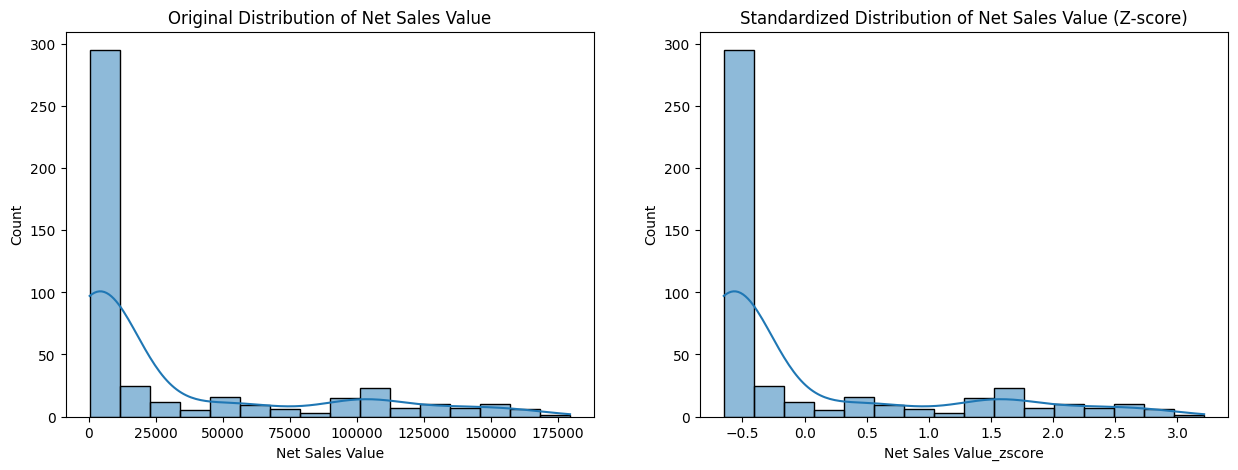

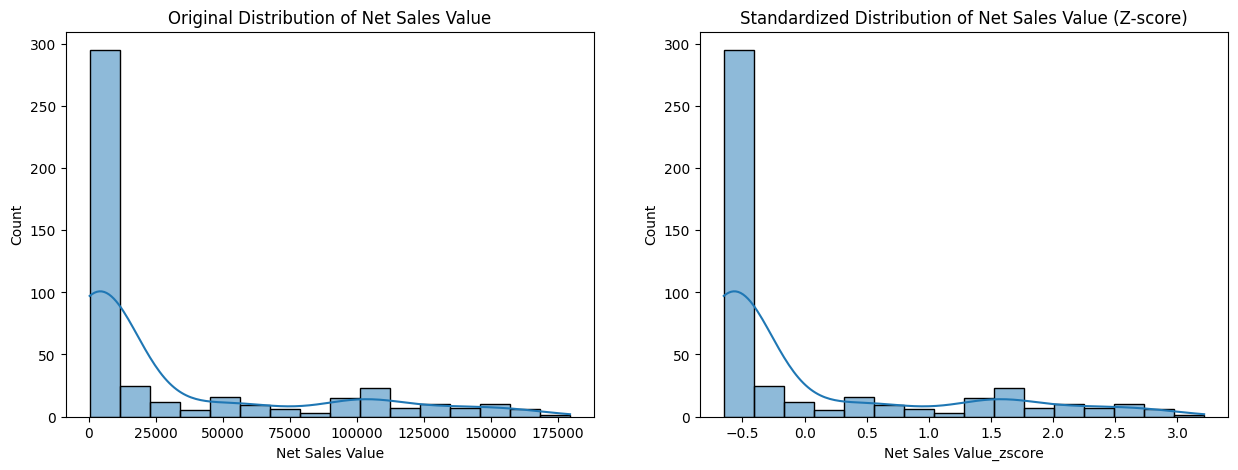

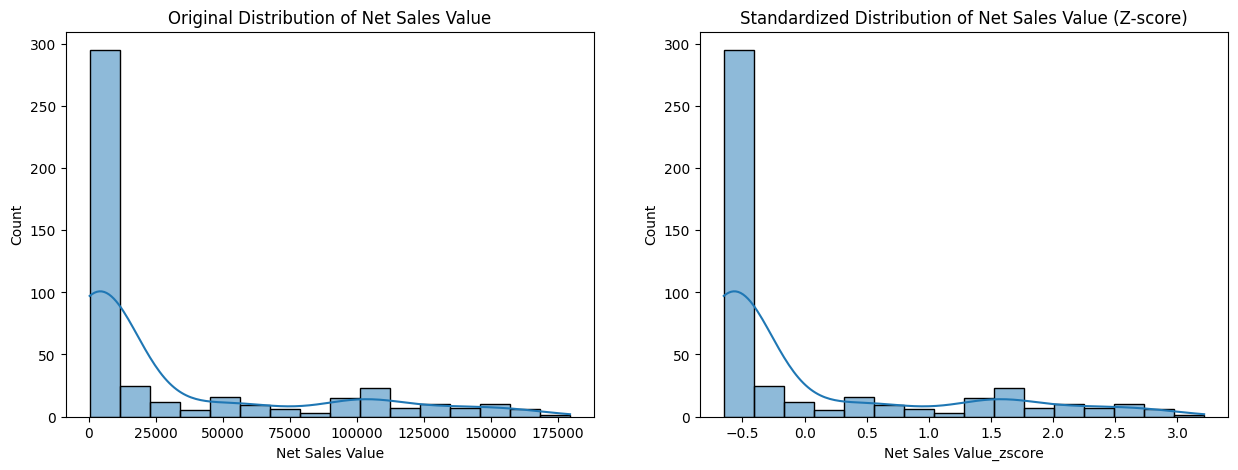

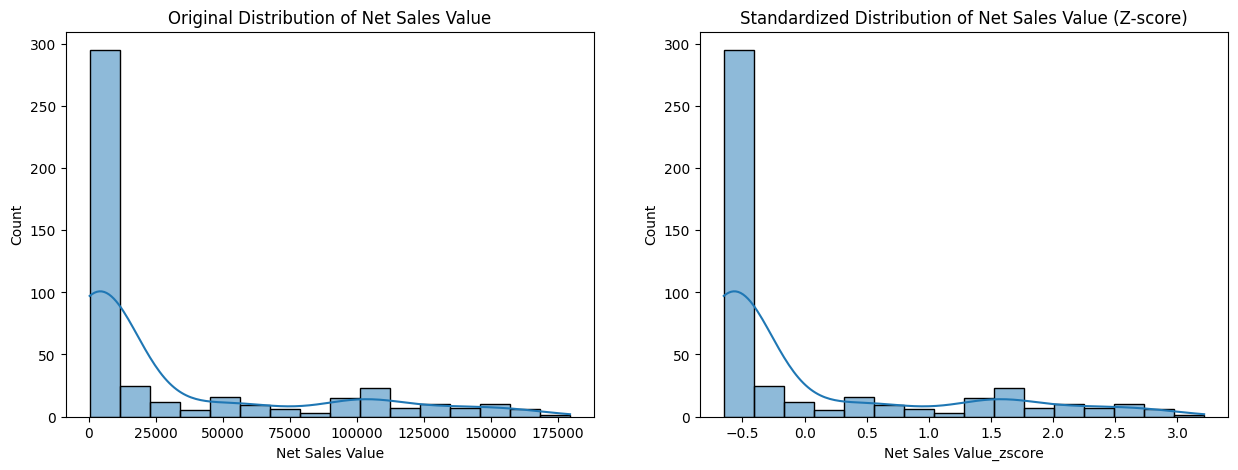

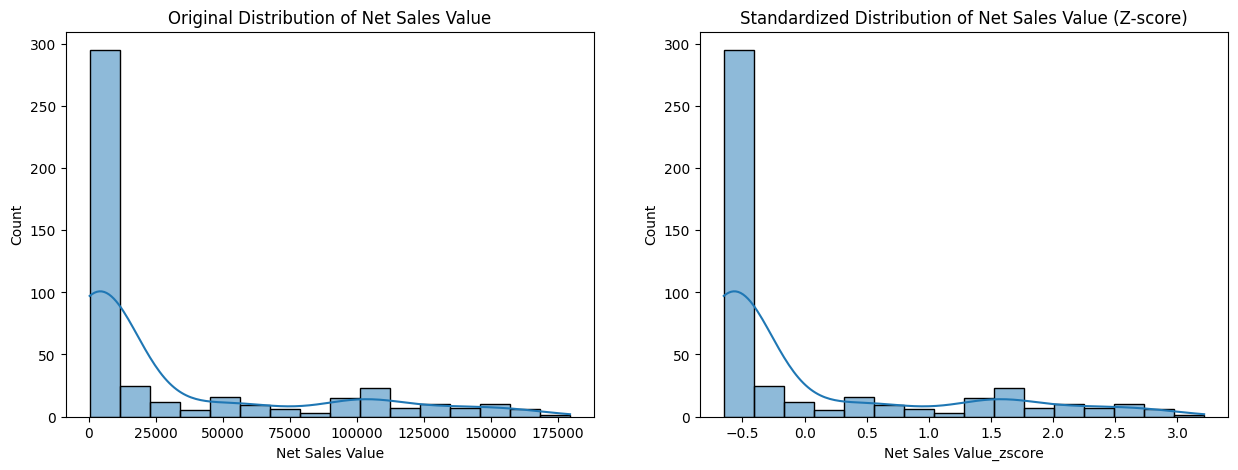

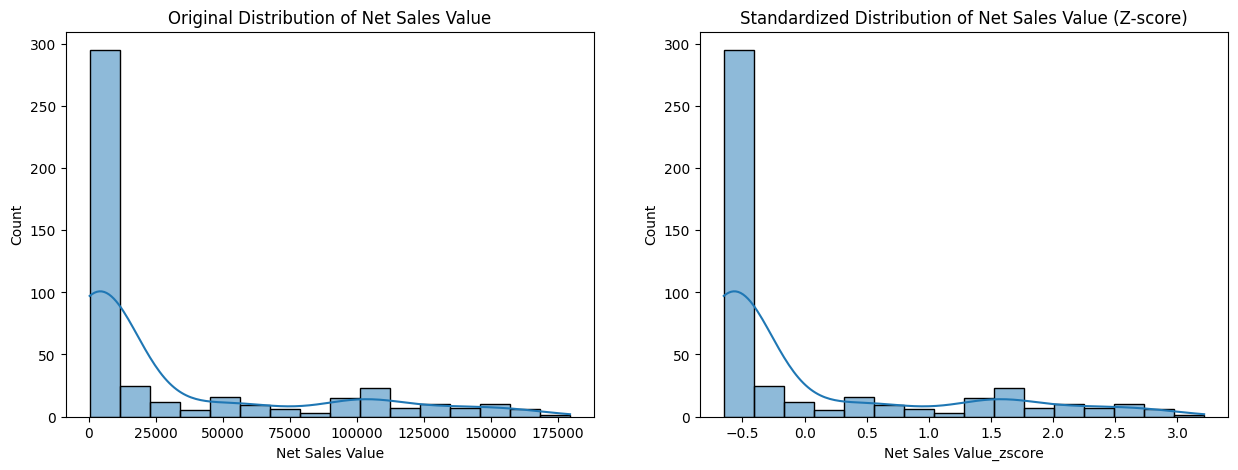

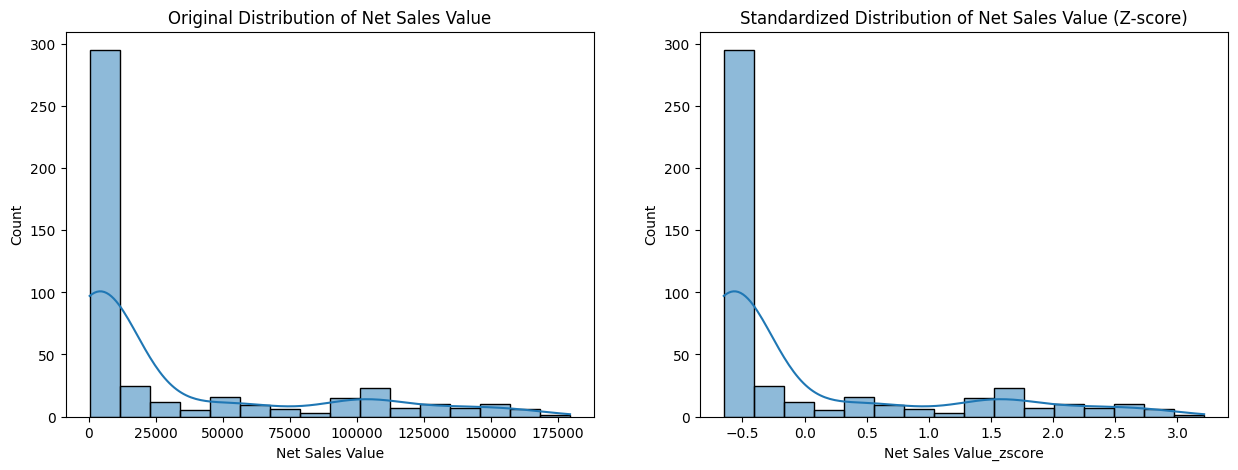

In [ ]:
for column in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Original distribution
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Original Distribution of {col}')

    # Standardized distribution
    sns.histplot(df[col + '_zscore'], kde=True, ax=axes[1])
    axes[1].set_title(f'Standardized Distribution of {col} (Z-score)')

    plt.show()

In [ ]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category'])


In [ ]:
categorical_cols_df = pd.read_csv('/content/sales_data_with_discounts.csv')
categorical_cols = categorical_cols_df.select_dtypes(exclude=['number']).columns

# Now perform one-hot encoding on the original dataframe with original categorical columns
original_df = pd.read_csv('/content/sales_data_with_discounts.csv') # read original dataframe
df = pd.get_dummies(original_df, columns=categorical_cols, drop_first=True)

# Display a portion of the transformed dataset
print(df.head())

   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...